# Trip Advisor Hotel Reviews

**Exploring Hotel review Prediction,**
**The dataset used consist of 20k reviews crawled from Tripadvisor.**



In [1]:
# Library import

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split



In [2]:
# Importing and viewing dataset

df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
# shape of the dataset

df.shape

(20491, 2)

In [4]:
# Dytpe of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
# Count of each rating in dataset

df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

The Highest Rating "5" has a count of 9054


In [6]:
#Describe Dataset

df['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [7]:
# Null value check

df.isna().any().sum()

0

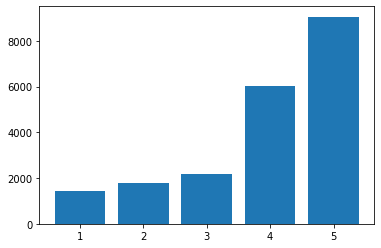

In [8]:
counter = Counter(df['Rating'])

# plotting the distribution

plt.bar(counter.keys(), counter.values())
plt.show()

In [9]:
#counting length of characters in review

df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


<AxesSubplot:xlabel='Rating', ylabel='Length'>

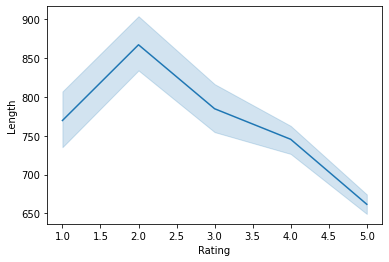

In [10]:
# Rating plot for review character count

sns.lineplot(data=df, x='Rating', y='Length')

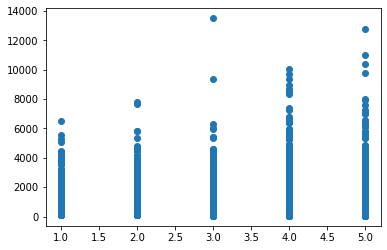

In [11]:
plt.scatter(data=df, x='Rating', y='Length')

In [12]:
# class rename

def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

In [13]:
df['Rating_2'] = df['Rating'].apply(rating)

In [14]:
df.head()

,Review,Rating,Length,Rating_2
0,nice hotel expensive parking got good deal sta...,4,593,Good
1,ok nothing special charge diamond member hilto...,2,1689,Bad
2,nice rooms not 4* experience hotel monaco seat...,3,1427,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,600,Good
4,"great stay great stay, went seahawk game aweso...",5,1281,Good


## Cleaning Reviews

To cleaning
reviews, we do the following:

* Split tokens on white space.
* Remove all punctuation from words.
* Remove all words that are not purely comprised of alphabetical characters.
* Remove all words that are known stop words.


In [15]:
# Data cleaning and Preparation


def textpreprocessing(text):
    #remove punctuations and uppercase
    clean_text = re.sub('[^a-zA-Z]',' ', text)
    
    clean_text = clean_text.lower().split()
    
    #remove stopwords
    s_words =set(stopwords.words('english'))
    
    clean_text = [word for word in clean_text  if word not in s_words]
    
    #lemmatize the word
    sentence = []
    
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [16]:
df['clean_review'] = df['Review'].apply(textpreprocessing)

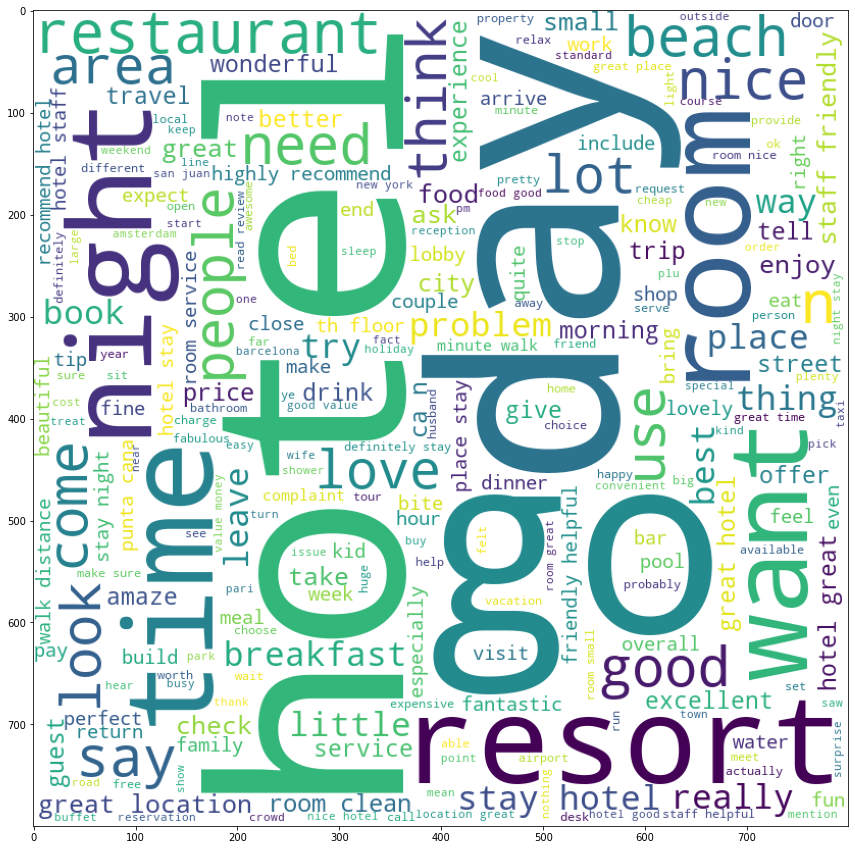

In [17]:
# Word Cloud plot for the highest occuring word for "Good" Rating

df_good = df[df["Rating_2"]== "Good"]

plt.figure(figsize=(15,15))

wc = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_good['clean_review']))

plt.imshow(wc)


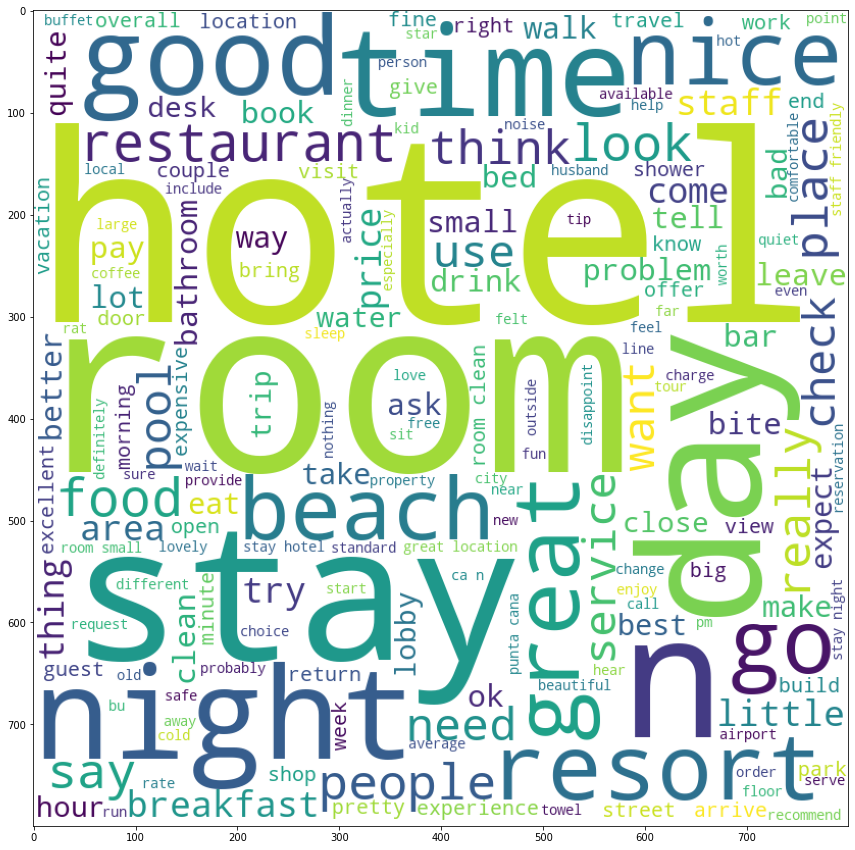

In [18]:
# Word Cloud plot for the highest occuring word for "Neutral" Rating

df_neutral = df[df["Rating_2"]== "Neutral"]

plt.figure(figsize=(15,15))

wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_neutral['clean_review']))

plt.imshow(wc1)


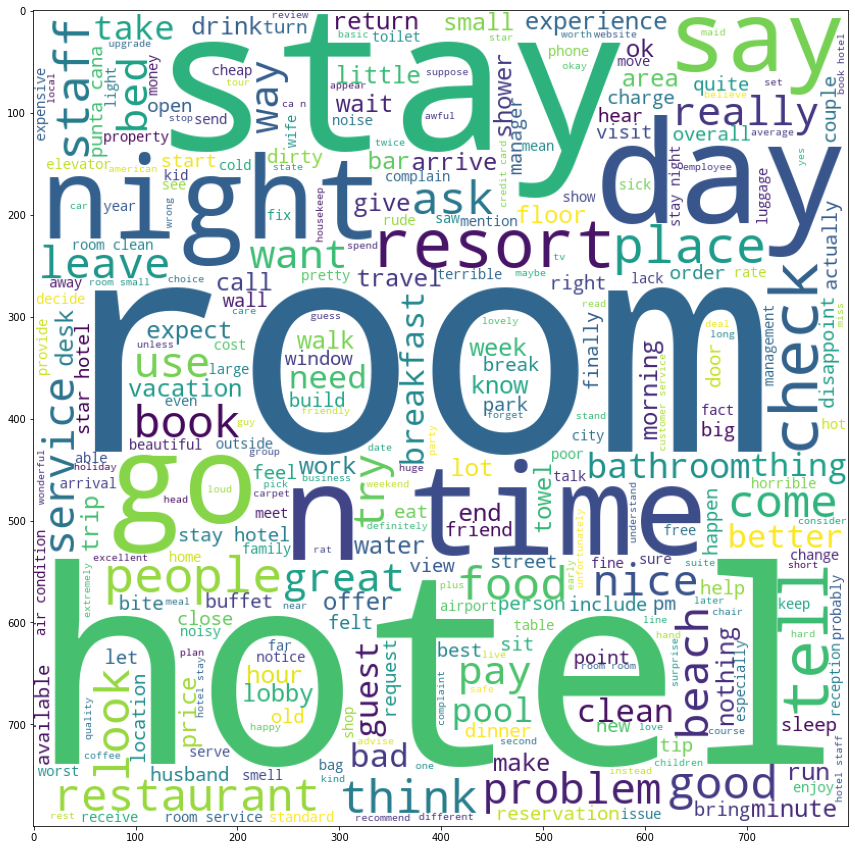

In [19]:
# Word Cloud plot for the highest occuring word for "Bad" Rating

df_bad = df[df["Rating_2"]== "Bad"]

plt.figure(figsize=(15,15))

wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_bad['clean_review']))

plt.imshow(wc2)

In [20]:

# Length of word in sentence
df['Length 2'] = df['clean_review'].apply(len)
df.head()

,Review,Rating,Length,Rating_2,clean_review,Length 2
0,nice hotel expensive parking got good deal sta...,4,593,Good,nice hotel expensive park get good deal stay h...,510
1,ok nothing special charge diamond member hilto...,2,1689,Bad,ok nothing special charge diamond member hilto...,1508
2,nice rooms not 4* experience hotel monaco seat...,3,1427,Neutral,nice room experience hotel monaco seattle good...,1263
3,"unique, great stay, wonderful time hotel monac...",5,600,Good,unique great stay wonderful time hotel monaco ...,543
4,"great stay great stay, went seahawk game aweso...",5,1281,Good,great stay great stay go seahawk game awesome ...,1107


In [21]:
average_review_size = int(sum([len(c) for c in
df.clean_review])/df.shape[0])
print(average_review_size)

646


# Data Splitting and Training

In [22]:
X = df['clean_review']
y = df['Rating_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ML Training


In [23]:
from sklearn.feature_extraction.text import CountVectorizer 

count_vectorizer = CountVectorizer(ngram_range=(1,2))

train_vectorize = count_vectorizer.fit_transform(X_train)
test_vectorize = count_vectorizer.transform(X_test)

In [25]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y_train_ml = labelencoder.fit_transform(y_train)
y_test_ml = labelencoder.fit_transform(y_test)

In [26]:
labelencoder.classes_

array(['Bad', 'Good', 'Neutral'], dtype=object)

In [27]:
print(train_vectorize.shape)
print(test_vectorize.shape)
print(y_trained_ml.shape)
print(y_test_ml.shape)

(16392, 724957)
(4099, 724957)
(16392,)
(4099,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(max_iter=1000)
]

In [30]:
names = [
    'KNN',
    'SVC',
    'DT',
    'RF',
    'AD',
    'LR',
]

In [31]:
accuracy = []

for model in classifiers:
    model.fit(train_vectorize,y_train_ml)
    y_pred = model.predict(test_vectorize)
    accuracy.append(accuracy_score(y_test_ml,y_pred)*100)

In [32]:
acc_Table = pd.DataFrame({'Model': names, 'Accuracy': accuracy})
acc_Table

,Model,Accuracy
0,KNN,74.579166
1,SVC,85.069529
2,DT,75.262259
3,RF,76.482069
4,AD,82.751891
5,LR,85.728226


In [33]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(train_vectorize,y_train_ml)
y_pred = lr_model.predict(test_vectorize)

print('Accuracy',":",accuracy_score(y_test_ml,y_pred)*100)

Accuracy : 85.72822639668212


In [34]:
print(classification_report(y_test_ml,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       625
           1       0.91      0.96      0.93      3042
           2       0.43      0.27      0.33       432

    accuracy                           0.86      4099
   macro avg       0.70      0.67      0.68      4099
weighted avg       0.84      0.86      0.85      4099



In [35]:
cm = confusion_matrix(y_test_ml,y_pred)

In [36]:
cm_df = pd.DataFrame(cm,
                     index = ['Bad', 'Good', 'Neutral'], 
                     columns = ['Bad', 'Good', 'Neutral'])

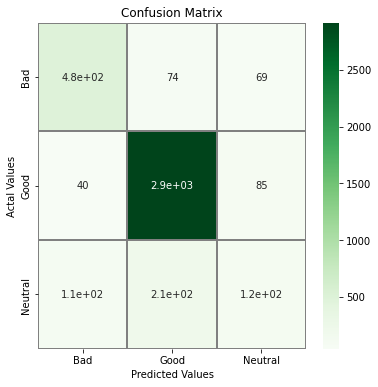

In [37]:
#Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,linewidths=0.01,cmap="Greens", linecolor="gray")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## DL Training


In [38]:
vocab_size = 10000
embedding_dim = 64
max_length = 646
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 37964 unique tokens.


In [41]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'hotel': 2,
 'room': 3,
 'stay': 4,
 'great': 5,
 'n': 6,
 'good': 7,
 'staff': 8,
 'time': 9,
 'nice': 10}

In [42]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



In [43]:
lb = LabelBinarizer()
y_trained_tranformed = lb.fit_transform(y_train)
y_test_transformed = lb.fit_transform(y_test)

In [44]:
print(train_padded.shape)
print(test_padded.shape)
print(y_trained_tranformed.shape)
print(y_test_transformed.shape)


(16392, 646)
(4099, 646)
(16392, 3)
(4099, 3)


In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.optimizers import Adam

In [49]:

base_learning_rate = 0.0001

model = Sequential()

model.add(Embedding(vocab_size, 16))

model.add(Bidirectional(LSTM(16, return_sequences = True)))

model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(16)))

model.add(Dropout(0.5))

model.add(Dense(16))

model.add(Dense(8))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=base_learning_rate, decay=base_learning_rate/40), metrics=['accuracy'])

model.summary()
    


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 32)          4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                6272      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

In [50]:
history = model.fit(train_padded, y_trained_tranformed, validation_data=(test_padded, y_test_transformed), epochs=10)


Epoch 1/10
513/513 [==============================] - 105s 200ms/step - loss: 0.8368 - accuracy: 0.7266 - val_loss: 0.7007 - val_accuracy: 0.7421
Epoch 2/10
513/513 [==============================] - 106s 206ms/step - loss: 0.5718 - accuracy: 0.7861 - val_loss: 0.4545 - val_accuracy: 0.8402
Epoch 3/10
513/513 [==============================] - 104s 202ms/step - loss: 0.4398 - accuracy: 0.8428 - val_loss: 0.4305 - val_accuracy: 0.8339
Epoch 4/10
513/513 [==============================] - 108s 209ms/step - loss: 0.3978 - accuracy: 0.8542 - val_loss: 0.4328 - val_accuracy: 0.8461
Epoch 5/10
513/513 [==============================] - 111s 216ms/step - loss: 0.3640 - accuracy: 0.8612 - val_loss: 0.4197 - val_accuracy: 0.8370
Epoch 6/10
513/513 [==============================] - 104s 202ms/step - loss: 0.3438 - accuracy: 0.8668 - val_loss: 0.4407 - val_accuracy: 0.8461
Epoch 7/10
513/513 [==============================] - 103s 201ms/step - loss: 0.3209 - accuracy: 0.8752 - val_loss: 0.4365 -

In [51]:

test_score = model.evaluate(test_padded, y_test_transformed)
print("")
print("[INFO] Accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

129/129 [==============================] - 4s 28ms/step - loss: 0.4811 - accuracy: 0.8383

[INFO] Accuracy: 83.83%
[INFO] Loss:  0.4810812771320343


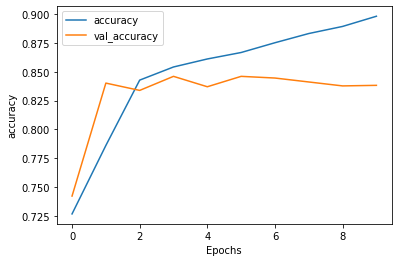

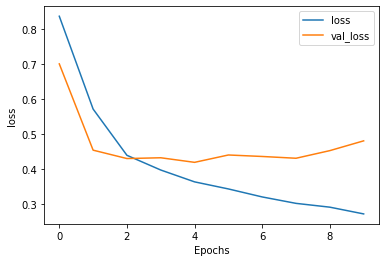

In [52]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [54]:
y_pred = model.predict(test_padded)

In [55]:

rounded_y_pred = lb.inverse_transform(y_pred)

rounded_y_test= lb.inverse_transform(y_test_transformed)

In [56]:
print(classification_report(rounded_y_test,rounded_y_pred))

              precision    recall  f1-score   support

         Bad       0.68      0.79      0.73       625
        Good       0.91      0.95      0.93      3042
     Neutral       0.27      0.12      0.16       432

    accuracy                           0.84      4099
   macro avg       0.62      0.62      0.61      4099
weighted avg       0.81      0.84      0.82      4099



In [57]:
cm = confusion_matrix(rounded_y_test, rounded_y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Bad', 'Good', 'Neutral'], 
                     columns = ['Bad', 'Good', 'Neutral'])

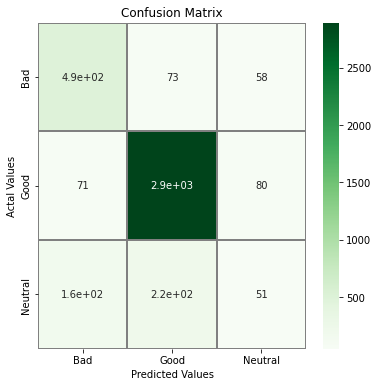

In [58]:
#Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,linewidths=0.01,cmap="Greens", linecolor="gray")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()